## Classification Model Evaluation

### import packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


### EDA

In [3]:
print(df.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [5]:
print(df.isna().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [6]:
# custom logic to convert textual to numerical
unique_gender_values = df['Gender'].unique()
replacement_values = [1, 2]
df = df.replace(unique_gender_values, replacement_values)
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       1   19            19000          0
1  15810944       1   35            20000          0
2  15668575       2   26            43000          0
3  15603246       2   27            57000          0
4  15804002       1   19            76000          0


In [7]:
# convert textual to numerical using OrdinalEncoder
# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder()
# encoder.fit(df)
# df_new_2 = encoder.transform(df)

In [8]:
corr = df.corr()
print(corr)

                  User ID    Gender       Age  EstimatedSalary  Purchased
User ID          1.000000  0.025249 -0.000721         0.071097   0.007120
Gender           0.025249  1.000000  0.073741         0.060435   0.042469
Age             -0.000721  0.073741  1.000000         0.155238   0.622454
EstimatedSalary  0.071097  0.060435  0.155238         1.000000   0.362083
Purchased        0.007120  0.042469  0.622454         0.362083   1.000000


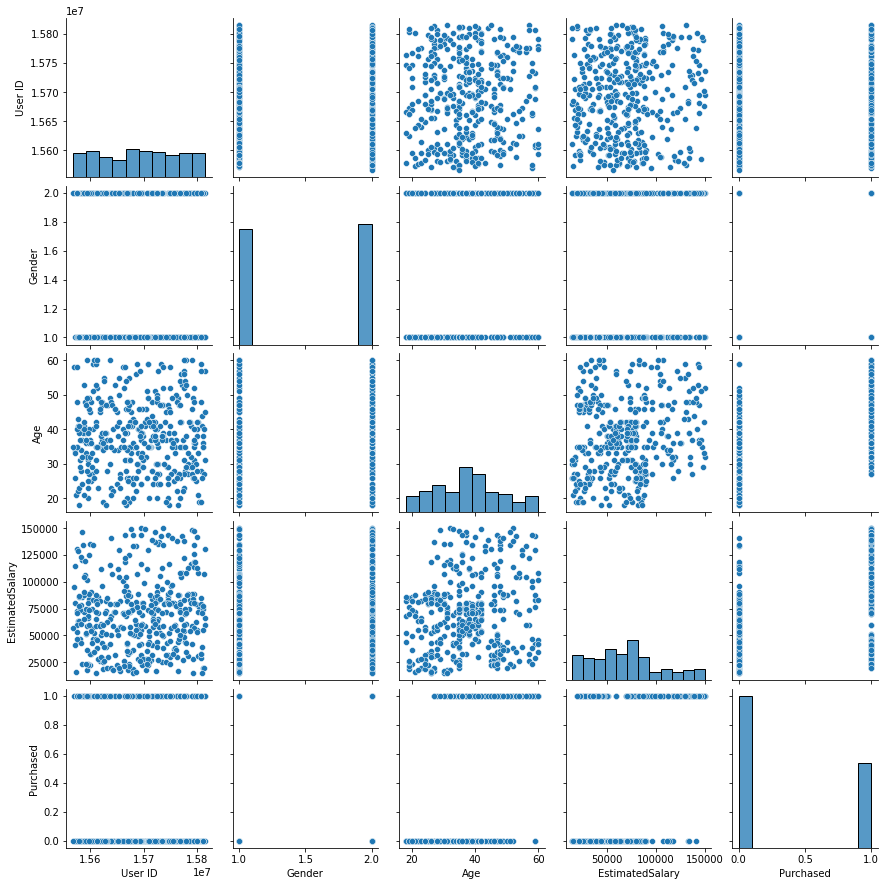

In [10]:
sns.pairplot(df)

### Model

In [11]:
# decide x and y

x = df.drop(['Purchased', 'User ID', 'Gender'], axis=1)
y = df['Purchased']
print(x)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


In [12]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123456)

In [13]:
from sklearn.linear_model import LogisticRegressionCV

# create the model
model = LogisticRegressionCV()

# train the model
model.fit(x_train, y_train)

LogisticRegressionCV()

### Model Evaluation

In [14]:
# predict the values
y_prediction = model.predict(x_test)

#### confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[55  1]
 [10 14]]


#### accuracy

In [16]:
accuracy = (cm[0, 0] + cm [1, 1]) / (cm[0, 0] + cm[0, 1] + cm [1, 1] + cm[1, 0])
print(f"accuracy = {accuracy * 100: 0.2f}%")

accuracy =  86.25%


In [17]:
from sklearn.metrics import accuracy_score

print(f"accuracy = {accuracy_score(y_test, y_prediction) * 100: 0.2f}%")

accuracy =  86.25%


#### precison score

In [18]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_prediction)
print(f"precision = {precision}")

precision = 0.9333333333333333


#### recall score

In [19]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_prediction)
print(f"recall = {recall}")

recall = 0.5833333333333334


#### f1 score

In [20]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_prediction)
print(f"f1 score = {f1}")

f1 score = 0.7179487179487181


#### classification report

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        56
           1       0.93      0.58      0.72        24

    accuracy                           0.86        80
   macro avg       0.89      0.78      0.81        80
weighted avg       0.87      0.86      0.85        80



#### AuC - ROC

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

ROC = roc_auc_score(y_test, y_prediction)
print(f"roc auc score = {ROC}")

roc auc score = 0.7827380952380953


[0.         0.01785714 1.        ]
[0.         0.58333333 1.        ]


Text(0, 0.5, 'TPR')

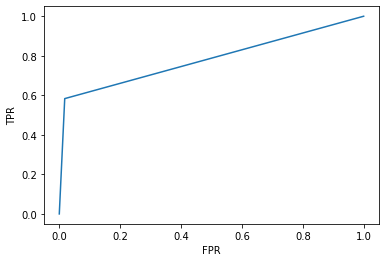

In [23]:
fpr, tpr, threshold = roc_curve(y_test, y_prediction)
print(fpr)
print(tpr)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

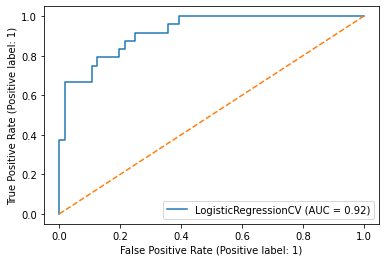

In [24]:
plot = plot_roc_curve(model, x_test, y_test)
plt.plot([0, 1], [0, 1], linestyle="--")

### Visualization

Text(0.5, 1.0, 'Age vs EstimatedSalary')

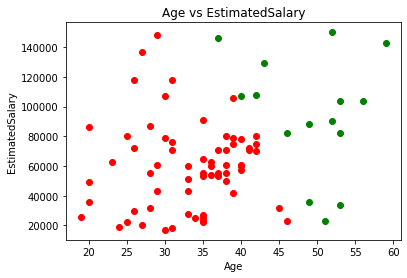

In [25]:
# if the person has purchased the product: green
plt.scatter(x_test['Age'][y_prediction == 1], x_test['EstimatedSalary'][y_prediction == 1], color="green")
# print(x_test['Age'][y_prediction == 1])
# print(y_prediction == 1)

# if the person has not purchased the product: red
plt.scatter(x_test['Age'][y_prediction == 0], x_test['EstimatedSalary'][y_prediction == 0], color="red")

plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Age vs EstimatedSalary')

Text(0.5, 1.0, 'Age vs EstimatedSalary')

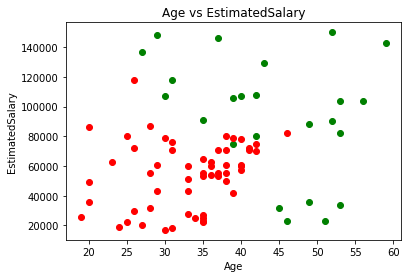

In [26]:
# if the person has purchased the product: green
plt.scatter(x_test['Age'][y_test == 1], x_test['EstimatedSalary'][y_test == 1], color="green")
# print(x_test['Age'][y_prediction == 1])
# print(y_prediction == 1)

# if the person has not purchased the product: red
plt.scatter(x_test['Age'][y_test == 0], x_test['EstimatedSalary'][y_test == 0], color="red")

plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Age vs EstimatedSalary')

### Prediction with unseen data

In [29]:
customer = [[30, 50000]]
prediction = model.predict(customer)
if prediction[0] == 0:
    print("This customer will not purchase the product")
else:
    print("This customer will purchase the product")
    
    
print(prediction)

This customer will not purchase the product
[0]
